In [1]:
'''
 Load data. Input files defined in yaml files (destest_bpz.yaml, destest_metacal.yaml,destest_gold.yaml)
 It requires destest : 
 https://github.com/des-science/destest
 
 catalogs (to be specified in the yaml files):
 
 Latest version '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'
 Latest subsampled version (for quick tests): '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18_subsampled.h5'
 
 I didn't manage to run the destest Calibrator. This means that if you directly load R1 and R2 from the catalog,
 they are only the respones of the sample and neglect the response of the selection (which is usually few %).
 The solution I got was to load the columns without selection (uncut=True)
 and apply the response and selection by myself.
'''


from multiprocessing import Pool,sharedctypes
from functools import partial
from contextlib import closing


import matplotlib.pyplot as plt
import numpy as np
import pyfits as pf
import healpy as hp
import h5py as h5

import os
import sys

import sys
#sys.path.insert(0, '/global/homes/m/mgatti/Mass_Mapping/systematic_checks/')
sys.path.insert(0, '/global/homes/m/mgatti/Cosmic_Shear/ABE/')
from routines import *
import numpy as np


# ******************************************************************
#                              INPUT
# ******************************************************************
nside = 1024  



# output folders ***************
name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_mastercat_04_20/final/'

if not os.path.exists(name_folder_x):
    os.mkdir(name_folder_x)

print ("done")

/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


done


# collate output          
            

In [2]:
# quick plots *******
path = './dvs'


rrs = ['y1__y1_rho0','y1__y1_rho1','y1__y1_rho2','y1__y1_rho3','y1__y1_rho4','y1__y1_rho5',
       'y3__rho0','y3__rho1','y3__rho2','y3__rho3','y3__rho4','y3__rho5',
       'y3__rho0_sw','y3__rho1_sw','y3__rho2_sw','y3__rho3_sw','y3__rho4_sw','y3__rho5_sw',
      'y3__p','y3__p_sw','y3__q','y3__q_sw','y3__w','y3__w_sw']


rho_dict = dict()
rho_dictm = dict()
for hh in range(1):
    ataus = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []
        
        if 'y1' in rr:
            pathu = path+'/{0}__withweight_nomean_'.format(rr)
        else:
            pathu = path+'/{0}__withweight'.format(rr)
        
        muteaa = load_obj(pathu)
       
        
  
        #path = name_folder_x+"_{0}/y3_sm2__{1}__noweight".format(hh,rr)
        #muteaa = load_obj(path)
        tpv.append(muteaa['high']["xip"])
        tmv.append(muteaa['high']["xim"])
        tp.append(muteaa['high']["corr_jckp"].T)
        tm.append(muteaa['high']["corr_jckm"].T)
        try:
            cc = covariance_jck(muteaa['high']["corr_jckp"].T,1000,'jackknife')
            ccm = covariance_jck(muteaa['high']["corr_jckm"].T,1000,'jackknife')
      
        except:
            cc = covariance_jck(muteaa['high']["corr_jckp"].T,100,'jackknife')
            ccm = covariance_jck(muteaa['high']["corr_jckm"].T,100,'jackknife')
      
        rho_dict[rr] = [muteaa['high']["theta"]*60,np.sqrt(muteaa['high']["xip"]**2),cc['err']]
        rho_dict[rr+"_pv"] = [muteaa['high']["theta"]*60,(muteaa['high']["xip"]),cc['err']]
        rho_dict[rr+"_mv"] = [muteaa['high']["theta"]*60,(muteaa['high']["xim"]),ccm['err']]
        
        ataus[rr+"_pv"]=tpv
        ataus[rr+"_mv"]=tmv
        



/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


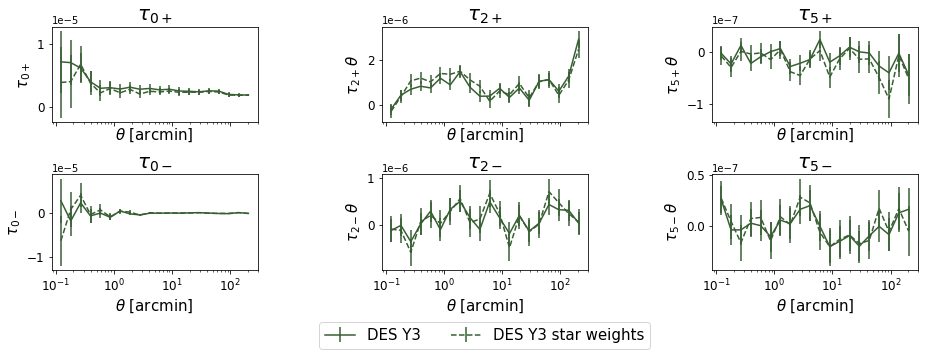

In [3]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 
colors = [c_2,c_3,c_23]



fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,5))




ll = 'y3__p_pv'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__q_pv'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')
ll = 'y3__w_pv'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')
ll = 'y3__p_mv'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__q_mv'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'DES Y3')
ll = 'y3__w_mv'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, label = 'Y3')




ll = 'y3__p_sw_pv'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, linestyle = 'dashed', label = 'Y3')
ll = 'y3__q_sw_pv'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__w_sw_pv'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__p_sw_mv'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, linestyle = 'dashed',label = 'Y3')
ll = 'y3__q_sw_mv'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'DES Y3 star weights')
ll = 'y3__w_sw_mv'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1]*rho_dict[ll][0],rho_dict[ll][2]*rho_dict[ll][0],color=c_3, linestyle = 'dashed',label = 'Y3')




ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'$\tau_{0+}$', size = 15)
ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'$\tau_{2+}\theta$', size = 15)
ax[0,1].set_title(r'$\tau_{2+}$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'$\tau_{5+}\theta$', size = 15)
ax[0,2].set_title(r'$\tau_{5+}$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'$\tau_{0-}$', size = 15)
ax[1,0].set_title(r'$\tau_{0-}$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'$\tau_{2-}\theta$', size = 15)
ax[1,1].set_title(r'$\tau_{2-}$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$\tau_{5-}\theta$', size = 15)
ax[1,2].set_title(r'$\tau_{5-}$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].legend(bbox_to_anchor=(0.5, -0.9),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)


'''
theta = rho_dict[ll][0]
ax[0,0].plot(theta ,mean_rho_y1['0']*np.ones(len(theta)))
ax[0,1].plot(theta ,mean_rho_y1['1']*np.ones(len(theta)))
ax[0,2].plot(theta ,mean_rho_y1['2']*np.ones(len(theta)))
ax[1,0].plot(theta ,mean_rho_y1['3']*np.ones(len(theta)))
ax[1,1].plot(theta ,mean_rho_y1['4']*np.ones(len(theta)))
ax[1,2].plot(theta ,mean_rho_y1['5']*np.ones(len(theta)))

'''
plt.xscale('log')
plt.tight_layout()
plt.savefig('taus.pdf',bbox_inches='tight')
plt.show()



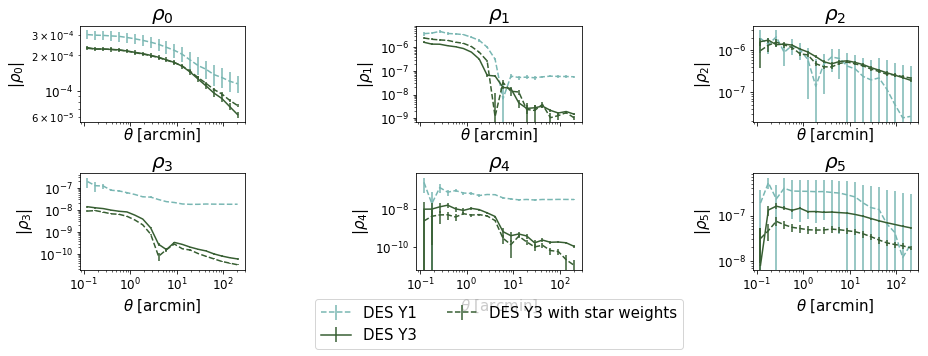

In [4]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 
colors = [c_2,c_3,c_23]



fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,5))


ll = 'y1__y1_rho0'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')
ll = 'y1__y1_rho1'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')
ll = 'y1__y1_rho2'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')
ll = 'y1__y1_rho3'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')
ll = 'y1__y1_rho4'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'DES Y1')
ll = 'y1__y1_rho5'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_23, linestyle = 'dashed',label = 'Y1')




ll = 'y3__rho0'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__rho1'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__rho2'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__rho3'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')
ll = 'y3__rho4'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'DES Y3')
ll = 'y3__rho5'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3, label = 'Y3')





ll = 'y3__rho0_sw'
ax[0,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__rho1_sw'
ax[0,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__rho2_sw'
ax[0,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__rho3_sw'
ax[1,0].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')
ll = 'y3__rho4_sw'
ax[1,1].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'DES Y3 with star weights')
ll = 'y3__rho5_sw'
ax[1,2].errorbar(rho_dict[ll][0],rho_dict[ll][1],rho_dict[ll][2],color=c_3,linestyle='dashed', label = 'Y3')





'''

'''


ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'|$\rho_0$|', size = 15)
ax[0,0].set_title(r'$\rho_0$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'|$\rho_1$|', size = 15)
ax[0,1].set_title(r'$\rho_1$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'|$\rho_2$|', size = 15)
ax[0,2].set_title(r'$\rho_2$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'|$\rho_3$|', size = 15)
ax[1,0].set_title(r'$\rho_3$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'|$\rho_4$|', size = 15)
ax[1,1].set_title(r'$\rho_4$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$|\rho_5$|', size = 15)
ax[1,2].set_title(r'$\rho_5$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].legend(bbox_to_anchor=(0.5, -0.9),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')



'''
theta = rho_dict[ll][0]
ax[0,0].plot(theta ,mean_rho_y1['0']*np.ones(len(theta)))
ax[0,1].plot(theta ,mean_rho_y1['1']*np.ones(len(theta)))
ax[0,2].plot(theta ,mean_rho_y1['2']*np.ones(len(theta)))
ax[1,0].plot(theta ,mean_rho_y1['3']*np.ones(len(theta)))
ax[1,1].plot(theta ,mean_rho_y1['4']*np.ones(len(theta)))
ax[1,2].plot(theta ,mean_rho_y1['5']*np.ones(len(theta)))

'''
plt.tight_layout()
plt.xscale('log')
plt.savefig('rho_stats.pdf',bbox_inches='tight')
plt.show()



# Load TAU from FLASK

In [86]:
path_flask = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_ABE_final_FLASK/final/'
xx = 1
rrs=["p","q","w"]
#r = load_obj(name_folder_x+"/response")

#R = [0.5*(r[0][0]+r[0][1]),0.5*(r[1][0]+r[1][1]),0.5*(r[2][0]+r[2][1]),0.5*(r[3][0]+r[3][1])]


nrel = 300
#for hh in range(zbins):
if 1==1:
    hh=0
    ataus_FLASK = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []

        for jk in range(nrel):
            path=path_flask +"_{0}/y3_sm2__{1}_FLASK_{2}__noweight".format(hh,rr,jk)
            muteaa = load_obj(path)
            tpv.append(muteaa['high']["xip"])#/R[hh])
            tmv.append(muteaa['high']["xim"])#/R[hh])
        ataus_FLASK[rr+"_pv"]=covariance_jck(np.array(tpv).T,nrel,'bootstrap')
        ataus_FLASK[rr+"_mv"]=covariance_jck(np.array(tmv).T,nrel,'bootstrap')
                                             
    hh=0
    ataus = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []

        path=name_folder_x+"_{0}/y3_sm2__{1}_full_noweight".format(hh,rr)
        muteaa = load_obj(path)
        tpv.append(muteaa['high']["xip"])#/R[hh])
        tmv.append(muteaa['high']["xim"])#/R[hh])
        tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
        tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
        ataus[rr+"_pv"]=covariance_jck(np.array(tp)[0],1000,'jackknife')
        ataus[rr+"_mv"]=covariance_jck(np.array(tp)[0],1000,'jackknife')
                                
                    

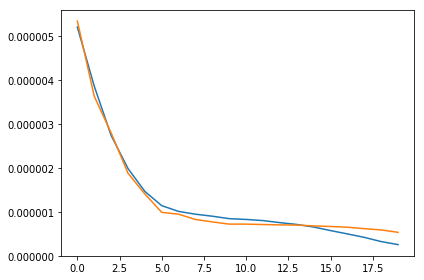

In [87]:
rr = 'p'
plt.plot(ataus[rr+"_pv"]['err'])
plt.plot(ataus_FLASK[rr+"_pv"]['err'])

/global/homes/m/mgatti/.conda/envs/myenv/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


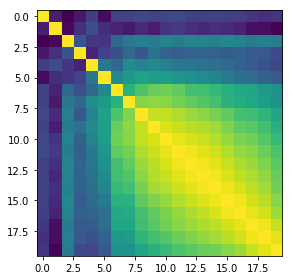

In [29]:
#for hh in range(zbins):
if 1==1:
    hh=0
    ataus = dict()
    for rr in rrs:
        tpv = []
        tmv = []
        tp = []
        tm = []

        path=name_folder_x+"_{0}/y3_sm2__{1}_full_noweight".format(hh,rr)
        muteaa = load_obj(path)
        tpv.append(muteaa['high']["xip"])#/R[hh])
        tmv.append(muteaa['high']["xim"])#/R[hh])
        tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
        tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
        ataus[rr+"_pv"]=tpv
        ataus[rr+"_mv"]=tmv
        ataus[rr+"_p"]=tp
        ataus[rr+"_m"]=tm

# save TAU

In [ ]:
xx = 1


Arrs=["p","q","w"]

FLASK = False
SW = False

if SW :
    rrs=["y3__p_sw","y3__q_sw","y3__w_sw"]
else:
    rrs=["y3__p","y3__q","y3__w"]

    
hh=0
ataus = dict()
for hg,rr in enumerate(rrs):
    tpv = []
    tmv = []
    tp = []
    tm = []



    # NO mean subtraction
    pathu = './dvs/{0}__withweight'.format(rr)
    muteaa = load_obj(pathu)
    tpv.append(muteaa['high']["xip"])#/R[hh])
    tmv.append(muteaa['high']["xim"])#/R[hh])
    tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
    tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
    ataus[Arrs[hg]+"_p"]=tp
    ataus[Arrs[hg]+"_m"]=tm     

    ataus[Arrs[hg]+"_pv"]=tpv
    ataus[Arrs[hg]+"_mv"]=tmv

    # FLASK ****************
    if FLASK:
        jhp = []
        jhm = []
        for jk in range(nrel):
            path=path_flask +"_{0}/y3_sm2__{1}_FLASK_{2}__noweight".format(hh,Arrs[hg],jk)
            muteaa = load_obj(path)
            jhp.append(muteaa['high']["xip"])#/R[hh])
            jhm.append(muteaa['high']["xim"])#/R[hh]
        ataus[Arrs[hg]+"_p"]=np.array(jhp).T
        ataus[Arrs[hg]+"_m"]=np.array(jhm).T

for key in ataus.keys():
    try:
        #

        #FLASK
        if FLASK:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,nrel)
            woa = covariance_jck(ataus[key],nrel,"bootstrap")
        else:
            ataus[key] = np.array(ataus[key]).reshape(20*xx,1000)
            woa = covariance_jck(ataus[key],1000,"jackknife")

        #taus[key+"_cov"]=woa["cov"]
    except:
        ataus[key] = np.array(ataus[key]).reshape(20*xx)



entries=['p_p','p_m','q_p','q_m','w_p','w_m']
t = []
if FLASK:
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,300))
    t = np.array(t).reshape(6*np.array(t).shape[1],300)
    woa = covariance_jck(t,300,"bootstrap")      
else:
    for entr in entries:
        t.append(np.array(ataus[entr]).reshape(20*xx,1000))
    t = np.array(t).reshape(6*np.array(t).shape[1],1000)
    woa = covariance_jck(t,1000,"jackknife")


from astropy.io import fits
tau0marr = ataus["p_mv"]; tau2marr = ataus["q_mv"];  tau5marr = ataus["w_mv"];
tau0parr = ataus["p_pv"]; tau2parr = ataus["q_pv"];  tau5parr = ataus["w_pv"];
taus = [tau0parr, tau0marr, tau2parr, tau2marr, tau5parr, tau5marr]
taus_names = ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M']
##Format of the fit file output



names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(tau0marr)
outdata = np.recarray((nrows, ), dtype=dtype)
covmat = woa["cov"]
hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
for j, nam in enumerate(taus_names):
   outdata = np.recarray((nrows, ), dtype=dtype)
   array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
   for array, name in zip(array_list, names): outdata[name] = array

   corrhdu = fits.BinTableHDU(outdata, name=nam)
   hdul.insert(j+2, corrhdu)
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'TAU0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'TAU2'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'TAU5'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'

if SW:
    sw_label = '_sw_'
else:
    sw_label = ''
if FLASK:

    if os.path.exists("./dvs/" + 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'tau_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)

else:
    if os.path.exists("./dvs/" + 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'tau_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)
    
print ("done")

In [ ]:
FLASK = False
SW = True

if SW :
    rrs=["y3__rho0_sw","y3__rho1_sw","y3__rho2_sw","y3__rho3_sw","y3__rho4_sw","y3__rho5_sw"]
else:
    rrs=["y3__rho0","y3__rho1","y3__rho2","y3__rho3","y3__rho4","y3__rho5"]


Arrs=["rho0","rho1","rho2","rho3","rho4","rho5"] 
hh=0
ataus = dict()
for hg,rr in enumerate(rrs):
    tpv = []
    tmv = []
    tp = []
    tm = []

    pathu = './dvs/{0}__withweight'.format(rr)
    muteaa = load_obj(pathu)
    tpv.append(muteaa['high']["xip"])#/R[hh])
    tmv.append(muteaa['high']["xim"])#/R[hh])
    tp.append(muteaa['high']["corr_jckp"].T)#/R[hh])
    tm.append(muteaa['high']["corr_jckm"].T)#/R[hh])
    ataus[Arrs[hg]+"_pv"]=tpv
    ataus[Arrs[hg]+"_mv"]=tmv
    ataus[Arrs[hg]+"_p"]=tp
    ataus[Arrs[hg]+"_m"]=tm
for key in ataus.keys():
    try:
        ataus[key] = np.array(ataus[key]).reshape(20*xx,1000)
        woa = covariance_jck(ataus[key],1000,"jackknife")
        #taus[key+"_cov"]=woa["cov"]
    except:
        ataus[key] = np.array(ataus[key]).reshape(20*xx)
entries=["rho0_p","rho0_m","rho1_p","rho1_m","rho2_p","rho2_m","rho3_p","rho3_m","rho4_p","rho4_m","rho5_p","rho5_m"]











t = []
for entr in entries:
    t.append(np.array(ataus[entr]).reshape(20*xx,1000))
t = np.array(t).reshape(12*np.array(t).shape[1],1000)
woa = covariance_jck(t,1000,"jackknife")


from astropy.io import fits

taus = [ataus["rho0_pv"], ataus["rho0_mv"], ataus["rho1_pv"],ataus["rho1_mv"],ataus["rho2_pv"],ataus["rho2_mv"],ataus["rho3_pv"],ataus["rho3_mv"],ataus["rho4_pv"],ataus["rho4_mv"],ataus["rho5_pv"],ataus["rho5_mv"]]
taus_names = ['RHO0P', 'RHO0M','RHO1P','RHO1M','RHO2P','RHO2M','RHO3P','RHO3M', 'RHO4P','RHO4M', 'RHO5P', 'RHO5M']
##Format of the fit file output



names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(ataus["rho0_pv"])
outdata = np.recarray((nrows, ), dtype=dtype)
covmat = woa["cov"]
hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


angarray = np.array([muteaa['high']["theta"]*60.]*xx).reshape(xx*20)
for j, nam in enumerate(taus_names):
   outdata = np.recarray((nrows, ), dtype=dtype)
   array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
   for array, name in zip(array_list, names): outdata[name] = array

   corrhdu = fits.BinTableHDU(outdata, name=nam)
   hdul.insert(j+2, corrhdu)
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'RHO0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'RHO1'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'RHO2'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[1].header['NAME_3'] =  'RHO3'
hdul[1].header['STRT_3'] =  3*nrows
hdul[1].header['LEN_3'] = nrows
hdul[1].header['NAME_4'] =  'RHO4'
hdul[1].header['STRT_4'] =  4*nrows
hdul[1].header['LEN_4'] = nrows
hdul[1].header['NAME_5'] =  'RHO5'
hdul[1].header['STRT_5'] =  5*nrows
hdul[1].header['LEN_5'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'


    
if SW:
    sw_label = '_sw_'
else:
    sw_label = ''
if FLASK:

    if os.path.exists("./dvs/" + 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'rho_{1}_FLASK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)

else:
    if os.path.exists("./dvs/" + 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label)):
        os.remove("./dvs/"+ 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    outname = os.path.join("./dvs/", 'rho_{1}_JK_Y3_{0}.fits'.format(hh+1,sw_label))
    hdul.writeto(outname, overwrite=True)
    
print ("done")

In [7]:
1

1